In [1]:
#CIFAR-10 데이터셋 : 10가지 사물이 담긴 컬러 이미지
# 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭
#6만장 (학습용 5만장, 검증용 1만장)
#32x32 이미지
#32x32x3 RGB 컬러 이미지
# http://www.cs.toronto.edu/~kriz/cifar.html
from tensorflow.keras import datasets, utils
def make_data():
    #다운로드 경로 : 사용자 계정 디렉토리 하위의 .keras 디렉토리
    (X_train, y_train), (X_test,y_test)=datasets.cifar10.load_data()
    #원 핫 인코딩 처리
    y_train=utils.to_categorical(y_train,10)
    y_test=utils.to_categorical(y_test,10)
    #데이터 정규화
    X_train=X_train.astype("float32")
    X_test=X_test.astype("float32")
    X_train /= 255
    X_test /= 255
    return (X_train,y_train), (X_test,y_test)

In [2]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Activation,Flatten, Dropout
def make_model():
    model=Sequential()
    #padding="same" 출력크기를 입력크기와 같게 유지
    model.add(Conv2D(32,(3,3),padding="same", input_shape=X_train.shape[1:],activation='relu'))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    #학습률 0.0001, decay 학습속도를 감소시키는 옵션
    opt=optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)
    model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
    return model

In [3]:
a=isinstance(1, int) # True
b=isinstance(1.2, float) # True

In [4]:
def plot_loss(history, title=None):
    #history가 dict 타입이 아니면
    if not isinstance(history, dict):
        history=history.history
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    #타이틀이 설정되어 있지 않으면
    if title is not None:
        plt.title(title)
    plt.ylabel("손실")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능","검증 데이터 성능"],loc=0)

In [5]:
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history=history.history
    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])
    if title is not None:
        plt.title(title)
    plt.ylabel("정확도")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능","검증 데이터 성능"],loc=0)

In [6]:
(X_train,y_train),(X_test,y_test)=make_data()

170498071/170498071 [==============================] - 90s 1us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

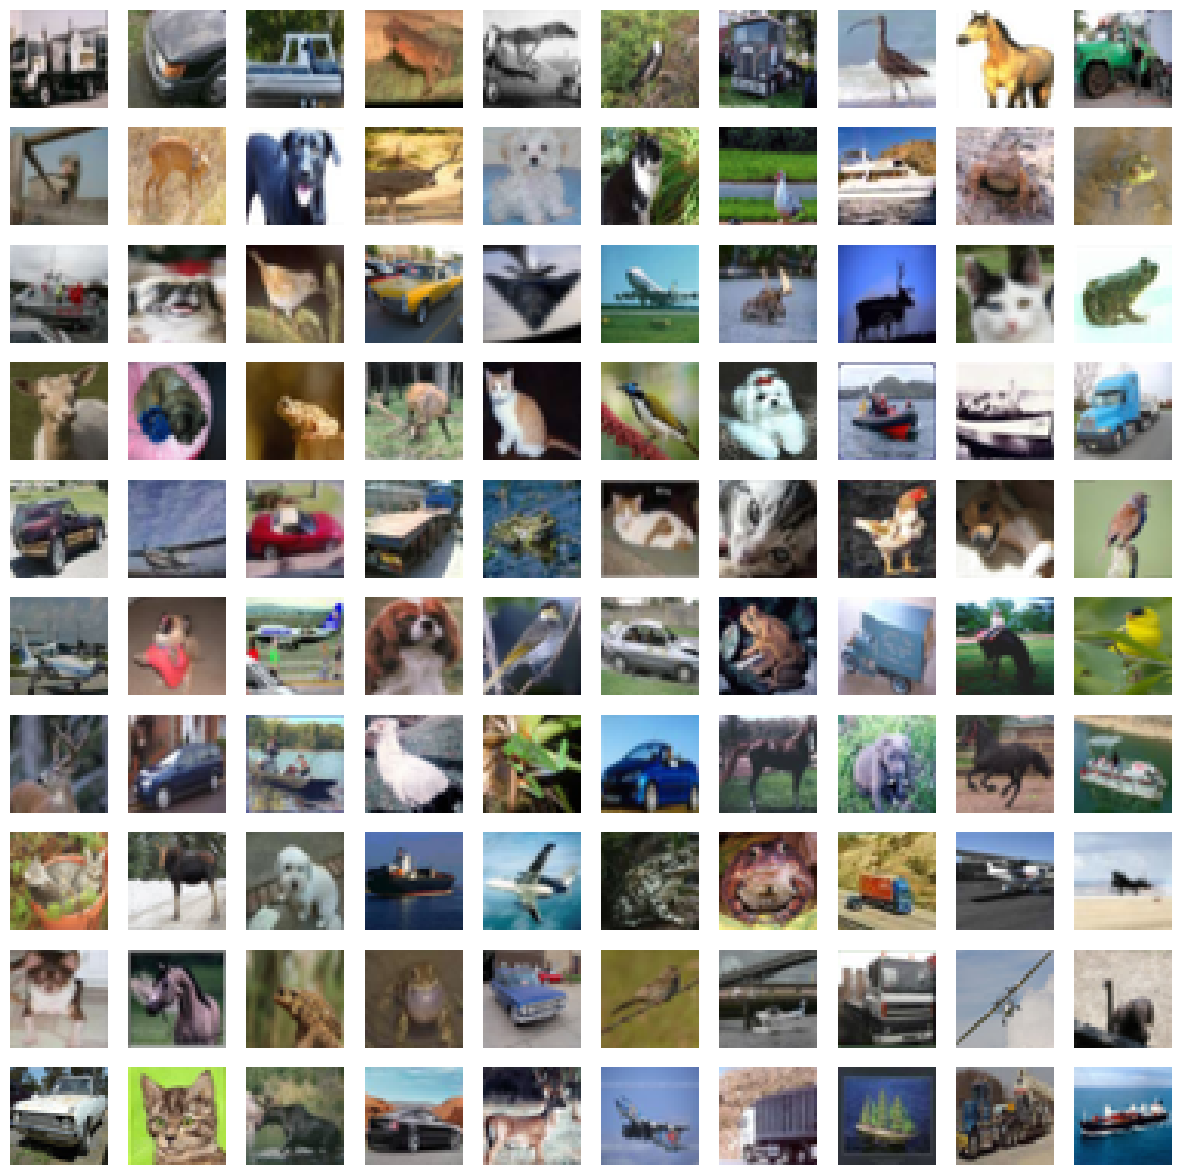

In [8]:
import numpy as np
import matplotlib.pyplot as plt
fig, axes1=plt.subplots(10,10,figsize=(15,15))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i:i+1][0])

In [9]:
#모델 생성
model=make_model()

In [10]:
#학습 시간이 오래 걸림
import tensorflow as tf
with tf.device('/GPU:0'):
    history=model.fit(X_train,y_train,epochs=3,batch_size=32,validation_split=0.2)

Epoch 1/3
1250/1250 [==============================] - 22s 12ms/step - loss: 1.7777 - accuracy: 0.3524 - val_loss: 1.5743 - val_accuracy: 0.4284
Epoch 2/3
1250/1250 [==============================] - 15s 12ms/step - loss: 1.4893 - accuracy: 0.4609 - val_loss: 1.3726 - val_accuracy: 0.5102
Epoch 3/3
1250/1250 [==============================] - 15s 12ms/step - loss: 1.3466 - accuracy: 0.5163 - val_loss: 1.3001 - val_accuracy: 0.5456


In [11]:
#성능 평가
performance_test=model.evaluate(X_test,y_test,batch_size=128)
print(performance_test)

79/79 [==============================] - 1s 6ms/step - loss: 1.2912 - accuracy: 0.5394
[1.291197419166565, 0.5393999814987183]


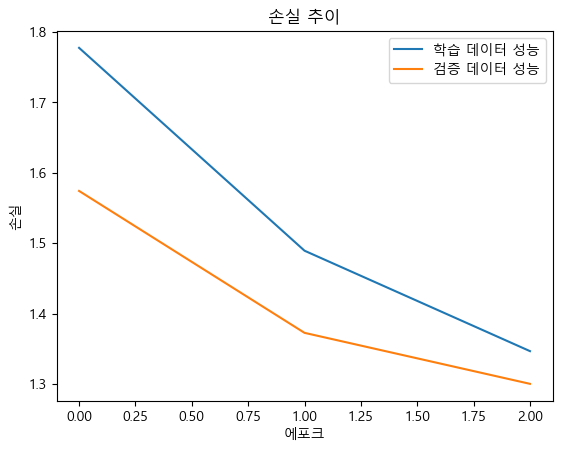

In [12]:
import matplotlib
import matplotlib.font_manager as fm
font_location="c:/windows/fonts/malgun.ttf"
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc("font",family=font_name)
plot_loss(history,"손실 추이")
plt.show()

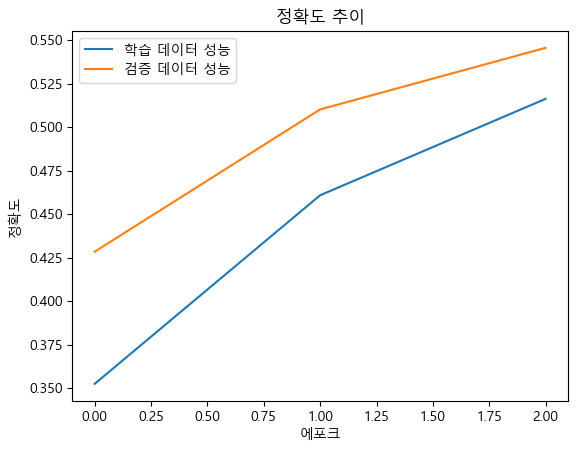

In [13]:
plot_acc(history, '정확도 추이')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test,verbose=1)
y_pred=np.argmax(y_pred, axis=1)
confusion_matrix(np.argmax(y_test,axis=1),y_pred)

313/313 [==============================] - 1s 2ms/step


array([[495,  89,  31,  18,   5,  19,  16,  15, 204, 108],
       [ 11, 780,   5,   4,   0,   9,  10,  12,  31, 138],
       [ 74,  44, 250,  87,  75, 168, 113,  93,  42,  54],
       [ 16,  30,  26, 282,  21, 325, 108,  86,  25,  81],
       [ 36,  27,  61,  74, 268, 136, 184, 162,  24,  28],
       [ 14,  20,  25, 112,  23, 603,  44, 118,  16,  25],
       [  4,  23,  23,  63,  15,  56, 721,  34,   7,  54],
       [ 15,  24,   9,  45,  23, 130,  30, 644,  11,  69],
       [ 53, 121,  11,  13,   2,   9,   6,  13, 687,  85],
       [ 23, 192,   8,  11,   2,   7,  14,  30,  49, 664]], dtype=int64)

In [15]:
model.save('c:/data/cifar/cifar.h5')